In [2]:
from fastcore.xtras import load_pickle
import pandas as pd 
import os 
from glob import glob
from pathlib import Path
from scipy.stats import sem
import matplotlib.pyplot as plt
import pycm 

FOLDER = 'out'

In [3]:
if not os.path.exists(FOLDER):
    raise FileExistsError('Cannot find folder {}'.format(FOLDER))

all_res = glob(f'{FOLDER}/*.pkl')
print('Pickles found in {}: {}'.format(FOLDER, len(all_res)))

Pickles found in out: 27


In [4]:
compiled_res_list = []
conf_mats = []

for results in all_res:
    res_full = load_pickle(results)
    res = res_full['results']
    print(res_full)
    summary = {
        'size': res_full['train_size'],
        #'test_size': len(res_full['predictions']),
        'representation': res_full['data_summary']['representation'],
        'target': res_full['data_summary']['target'],
        'accuracy': res['accuracy'],
        'f1_macro': res['f1_macro'],
        'f1_micro': res['f1_micro'],
        'kappa': res['kappa'],
        'num_epochs': res_full['config']['tune_settings']['num_train_epochs'],
        'lr': res_full['config']['tune_settings']['learning_rate'],
        'bins': len(set(res['all_y_true']))
       
    }
    confusion_matrix = {
        'all_y_true':res['all_y_true'],
        'all_y_pred':res['all_y_pred']
    }
    conf_mats.append(confusion_matrix)
    compiled_res_list.append(summary)

{'results': {'accuracy': 0.5, 'acc_macro': 0.5, 'racc': 0.5, 'kappa': 0.0, 'confusion_matrix': pycm.ConfusionMatrix(classes: [0, 1]), 'f1_macro': 0.3333333333333333, 'f1_micro': 0.5, 'frac_valid': 1.0, 'all_y_true': [1, 0, 0, 0, 1, 1], 'all_y_pred': array([1, 1, 1, 1, 1, 1]), 'valid_indices': [0, 1, 2, 3, 4, 5], 'might_have_rounded_floats': False}, 'predictions': array([1, 1, 1, 1, 1, 1]), 'true': array([1, 0, 0, 0, 1, 1]), 'train_size': 50, 'config': {'property_name': 'Heat of Formation (Kj/molH20)', 'tune_settings': {'num_train_epochs': 25, 'learning_rate': 0.0003, 'per_device_train_batch_size': 2}, 'tokenizer_kwargs': {'cutoff_len': 128}, 'base_model': 'EleutherAI/gpt-j-6b', 'batch_size': 2, 'inference_batch_size': 2}, 'data_summary': {'datafile': 'final_noDuplicates.csv', 'target': 'OER_bool', 'representation': 'elements_linkers'}}
{'results': {'accuracy': 0.7142857142857143, 'acc_macro': 0.7142857142857143, 'racc': 0.5, 'kappa': 0.4285714285714286, 'confusion_matrix': pycm.Confusi

In [5]:
compiled_res = pd.DataFrame(compiled_res_list)
grouped_res =compiled_res.groupby(['target','bins', 'num_epochs', 'representation', 'size']).agg(['mean', 'sem'])


In [6]:
grouped_res


accuracy            f1_macro  \
                                                    mean       sem      mean   
target   bins num_epochs representation   size                                 
HER_bool 2    25         elements_linkers 50    0.916667  0.048113  0.914885   
                         elements_nodes   50    0.694444  0.073493  0.693473   
                         elemetns_all     50    0.777778  0.055556  0.773016   
OER_bool 2    25         elements_linkers 50    0.666667  0.096225  0.609524   
                         elements_nodes   50    0.888889  0.055556  0.885714   
                         elemetns_all     50    0.833333  0.096225  0.831746   
VIS_bool 2    25         elements_linkers 50    0.952381  0.023810  0.952137   
                         elements_nodes   50    0.595238  0.062994  0.585918   
                         elemetns_all     50    0.880952  0.023810  0.879838   

                                                          f1_micro            \
                                                     sem      mean       sem   
target   bins num_epochs representation   size                                 
HER_bool 2    25         elements_linkers 50    0.049491  0.916667  0.048113   
                         elements_nodes   50    0.074230  0.694444  0.073493   
                         elemetns_all     50    0.057953  0.777778  0.055556   
OER_bool 2    25         elements_linkers 50    0.145790  0.666667  0.096225   
                         elements_nodes   50    0.057143  0.888889  0.055556   
                         elemetns_all     50    0.096238  0.833333  0.096225   
VIS_bool 2    25         elements_linkers 50    0.023932  0.952381  0.023810   
                         elements_nodes   50    0.055741  0.595238  0.062994   
                         elemetns_all     50    0.024199  0.880952  0.023810   

                                                   kappa                lr  \
                                                    mean       sem    mean   
target   bins num_epochs representation   size                               
HER_bool 2    25         elements_linkers 50    0.833333  0.096225  0.0003   
                         elements_nodes   50    0.388889  0.146986  0.0003   
                         elemetns_all     50    0.555556  0.111111  0.0003   
OER_bool 2    25         elements_linkers 50    0.333333  0.192450  0.0003   
                         elements_nodes   50    0.777778  0.111111  0.0003   
                         elemetns_all     50    0.666667  0.192450  0.0003   
VIS_bool 2    25         elements_linkers 50    0.904762  0.047619  0.0003   
                         elements_nodes   50    0.190476  0.125988  0.0003   
                         elemetns_all     50    0.761905  0.047619  0.0003   

                                                     
                                                sem  
target   bins num_epochs representation   size       
HER_bool 2    25         elements_linkers 50    0.0  
                         elements_nodes   50    0.0  
                         elemetns_all     50    0.0  
OER_bool 2    25         elements_linkers 50    0.0  
                         elements_nodes   50    0.0  
                         elemetns_all     50    0.0  
VIS_bool 2    25         elements_linkers 50    0.0  
                         elements_nodes   50    0.0  
                         elemetns_all     50    0.0

{'elements_linkers': [0.92, 0.67, 0.95], 'elements_nodes': [0.69, 0.89, 0.6], 'elemetns_all': [0.78, 0.83, 0.88]}


/tmp/ipykernel_13084/4205615884.py:60: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


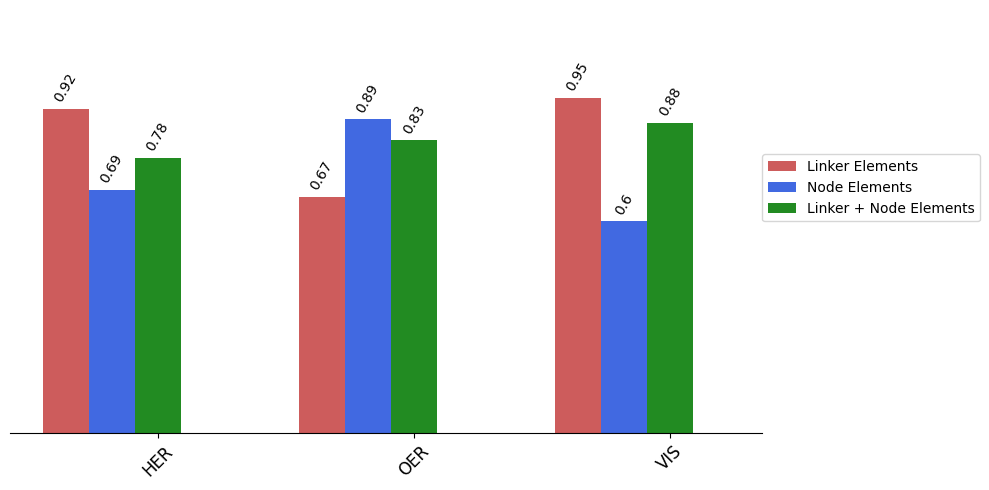

In [10]:
import numpy as np


grouped_res2 =compiled_res.groupby(['bins', 'num_epochs', 'size','representation', 'target']).agg(['mean', 'sem'])

properties = ['HER', 'OER', 'VIS']
full_acc_dict = {}

for representation in compiled_res['representation'].unique():
    sub_df = grouped_res2.loc[2, 25, 50, representation]


    acc_dict = {representation:[round(i,2) for i in sub_df['accuracy']['mean']]}
    full_acc_dict.update(acc_dict)
print(full_acc_dict)

new_dict = {'Linker Elements':full_acc_dict['elements_linkers'],
            'Node Elements':full_acc_dict['elements_nodes'],
            'Linker + Node Elements':full_acc_dict['elemetns_all'],
            #'mofid':full_acc_dict['mofid'],
            #'mofkey':full_acc_dict['mofkey']
            }

COLORS = {'Linker Elements':'indianred',
            'Node Elements':'royalblue',
            'Linker + Node Elements': 'forestgreen',
            #'mofid': 'purple',
            #'mofkey':'goldenrod'
            }


fig, ax = plt.subplots(layout='constrained', figsize = (10,5))
x = np.arange(len(properties))  # the label locations
width = 0.18 # the width of the bars
multiplier = 0

for attribute, measurement in new_dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute, color = COLORS[attribute])
    ax.bar_label(rects, padding=3, rotation = 60)
    multiplier += 1

ax.set_ylabel('Accuracy')

ax.get_yaxis().set_visible(False)
ax.spines[['right', 'top', 'left']].set_visible(False)

# Calculate the center of each group of bars
group_centers = x + (width * 2) * np.arange(len(properties))

# Set the x-ticks at the center of each group
ax.set_xticks(group_centers)

# Set the x-labels to your property values and center them between groups
ax.set_xticklabels(properties, rotation=45, ha="center", size =12)

ax.set_xticks(x + width+width, properties)
ax.legend(loc=(1,0.5))
ax.set_ylim(0, 1.2)
plt.tight_layout()

plt.savefig('accuracies.pdf')

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.50      1.00      0.67         3

    accuracy                           0.50         6
   macro avg       0.25      0.50      0.33         6
weighted avg       0.25      0.50      0.33         6



/home/jorenvanherck/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jorenvanherck/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/jorenvanherck/miniconda3/envs/sklearn-env/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

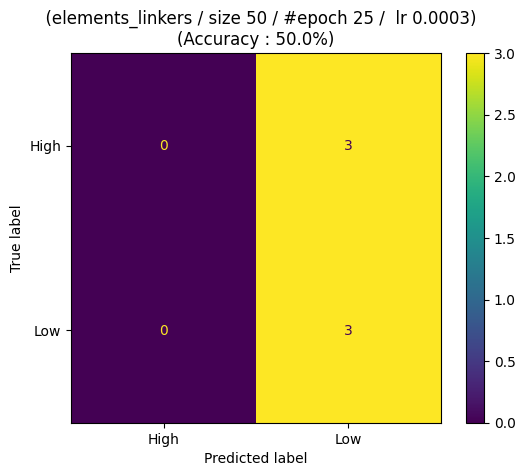

              precision    recall  f1-score   support

           0       0.64      1.00      0.78         7
           1       1.00      0.43      0.60         7

    accuracy                           0.71        14
   macro avg       0.82      0.71      0.69        14
weighted avg       0.82      0.71      0.69        14



<Figure size 640x480 with 0 Axes>

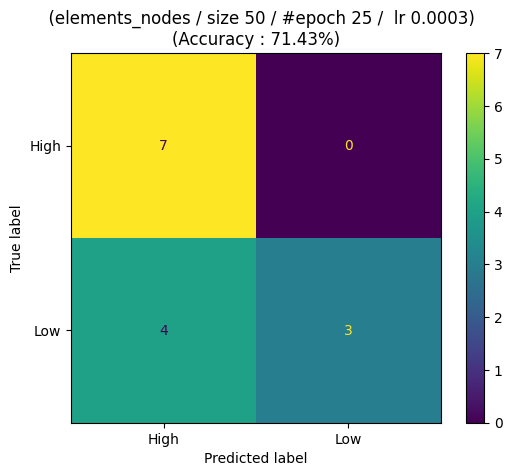

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         7

    accuracy                           1.00        14
   macro avg       1.00      1.00      1.00        14
weighted avg       1.00      1.00      1.00        14



<Figure size 640x480 with 0 Axes>

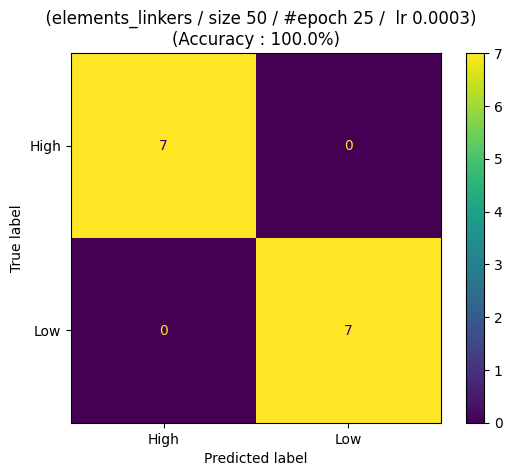

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.86      0.92         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14



<Figure size 640x480 with 0 Axes>

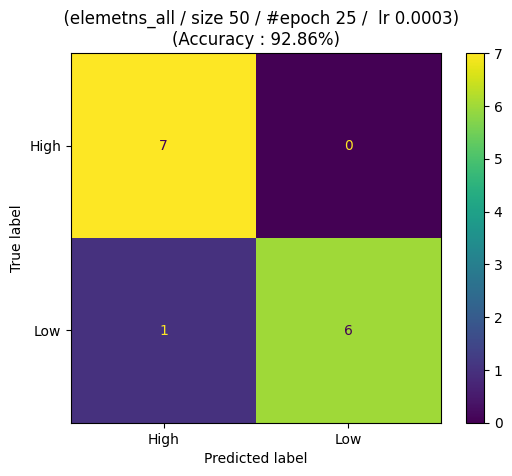

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



<Figure size 640x480 with 0 Axes>

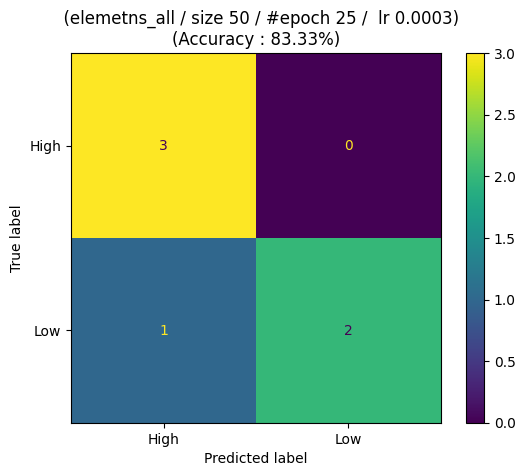

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



<Figure size 640x480 with 0 Axes>

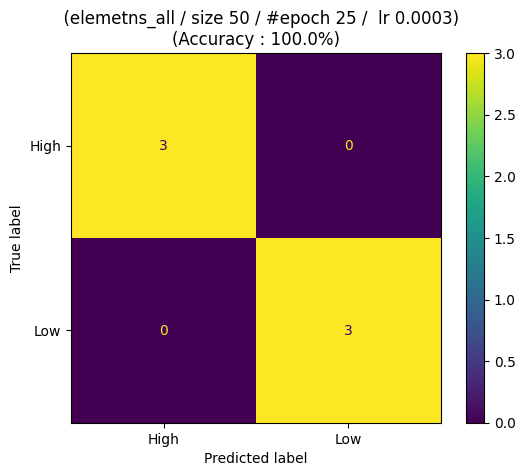

              precision    recall  f1-score   support

           0       0.50      0.57      0.53         7
           1       0.50      0.43      0.46         7

    accuracy                           0.50        14
   macro avg       0.50      0.50      0.50        14
weighted avg       0.50      0.50      0.50        14



<Figure size 640x480 with 0 Axes>

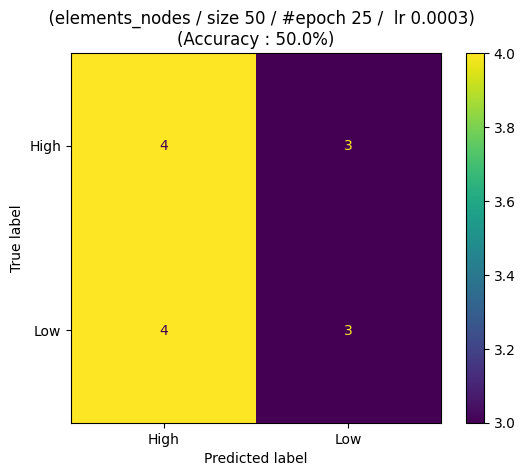

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.86      0.86      0.86         7

    accuracy                           0.86        14
   macro avg       0.86      0.86      0.86        14
weighted avg       0.86      0.86      0.86        14



<Figure size 640x480 with 0 Axes>

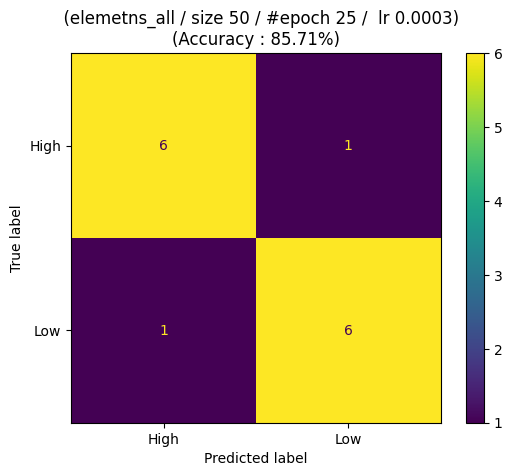

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



<Figure size 640x480 with 0 Axes>

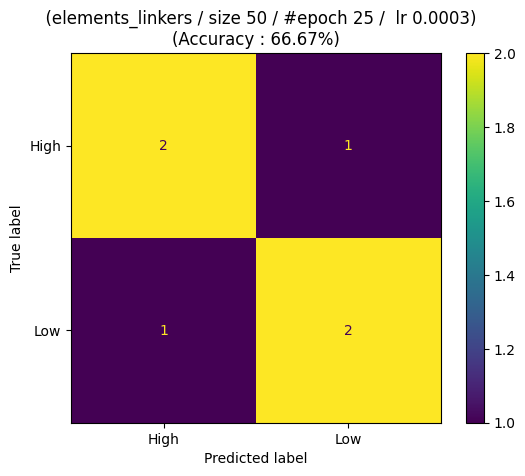

              precision    recall  f1-score   support

           0       0.75      0.50      0.60         6
           1       0.62      0.83      0.71         6

    accuracy                           0.67        12
   macro avg       0.69      0.67      0.66        12
weighted avg       0.69      0.67      0.66        12



<Figure size 640x480 with 0 Axes>

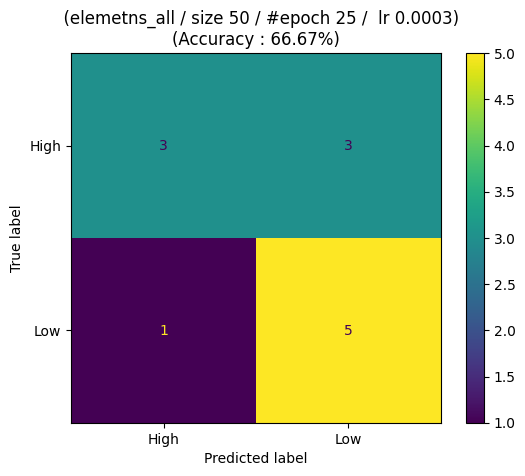

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



<Figure size 640x480 with 0 Axes>

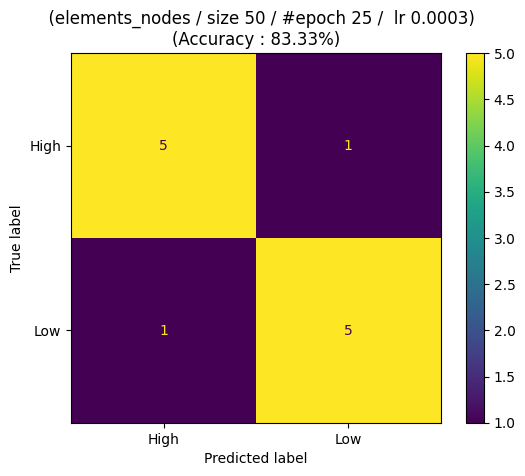

              precision    recall  f1-score   support

           0       0.83      0.83      0.83         6
           1       0.83      0.83      0.83         6

    accuracy                           0.83        12
   macro avg       0.83      0.83      0.83        12
weighted avg       0.83      0.83      0.83        12



<Figure size 640x480 with 0 Axes>

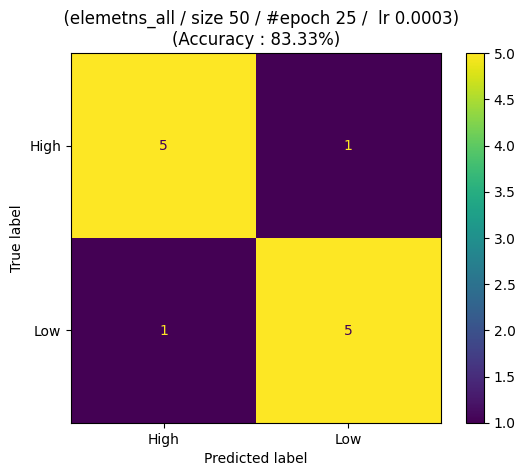

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



<Figure size 640x480 with 0 Axes>

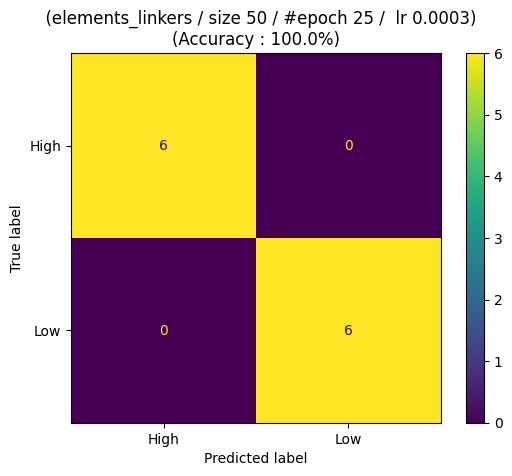

              precision    recall  f1-score   support

           0       1.00      0.83      0.91         6
           1       0.86      1.00      0.92         6

    accuracy                           0.92        12
   macro avg       0.93      0.92      0.92        12
weighted avg       0.93      0.92      0.92        12



<Figure size 640x480 with 0 Axes>

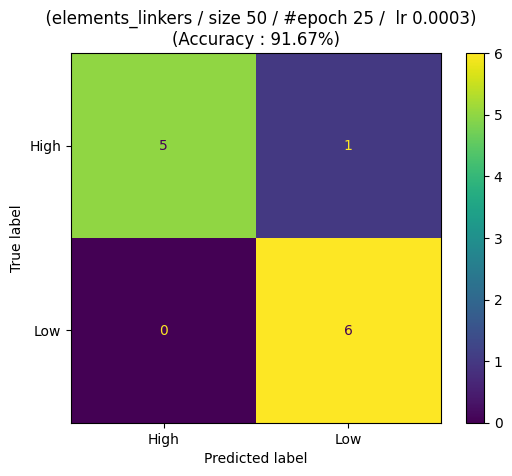

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



<Figure size 640x480 with 0 Axes>

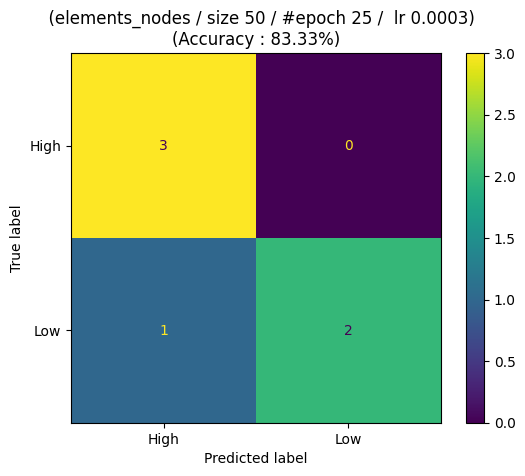

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.88      1.00      0.93         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14



<Figure size 640x480 with 0 Axes>

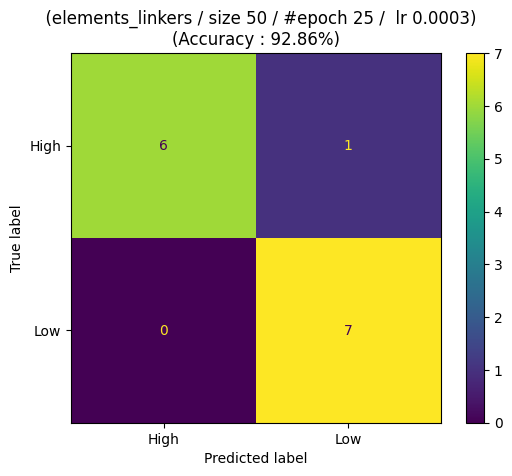

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



<Figure size 640x480 with 0 Axes>

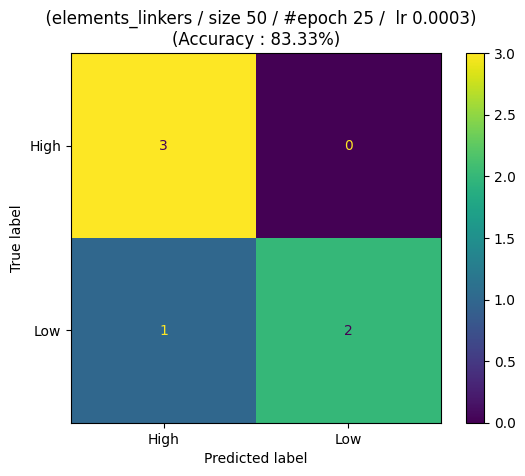

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         3
           1       1.00      1.00      1.00         3

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



<Figure size 640x480 with 0 Axes>

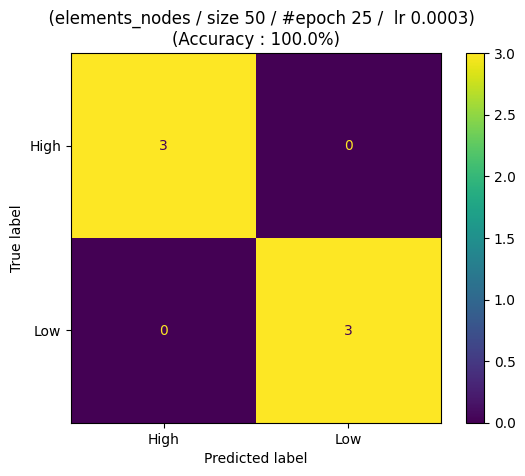

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       1.00      0.67      0.80         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



<Figure size 640x480 with 0 Axes>

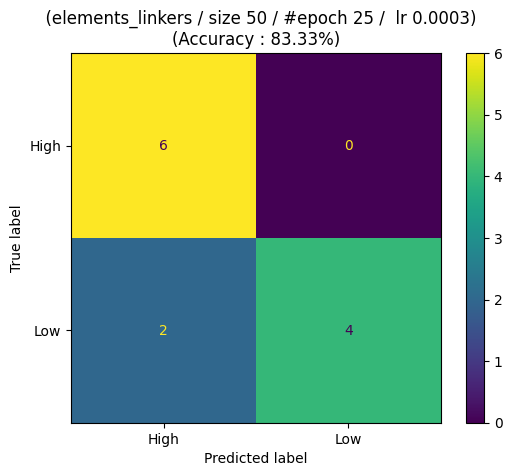

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.86      0.92         7

    accuracy                           0.93        14
   macro avg       0.94      0.93      0.93        14
weighted avg       0.94      0.93      0.93        14



<Figure size 640x480 with 0 Axes>

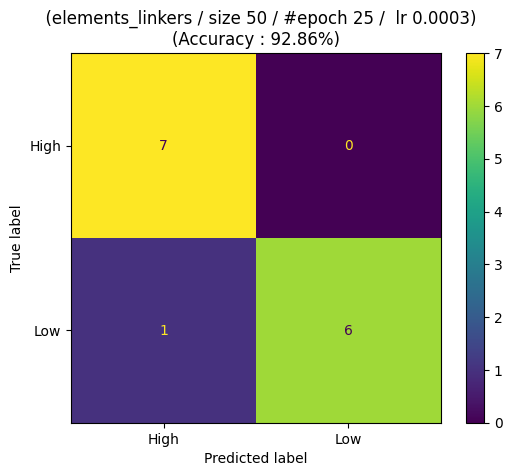

              precision    recall  f1-score   support

           0       0.57      0.67      0.62         6
           1       0.60      0.50      0.55         6

    accuracy                           0.58        12
   macro avg       0.59      0.58      0.58        12
weighted avg       0.59      0.58      0.58        12



<Figure size 640x480 with 0 Axes>

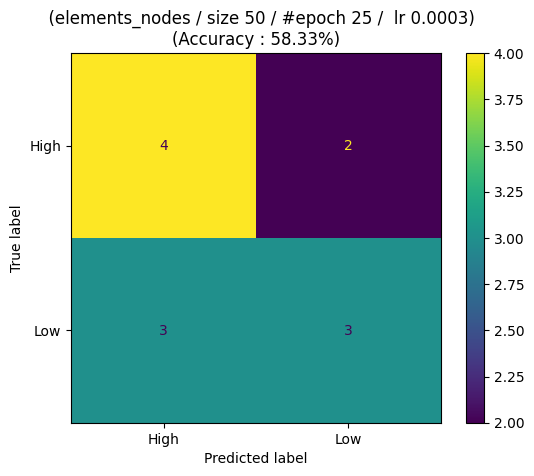

              precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       1.00      0.71      0.83         7

    accuracy                           0.86        14
   macro avg       0.89      0.86      0.85        14
weighted avg       0.89      0.86      0.85        14



<Figure size 640x480 with 0 Axes>

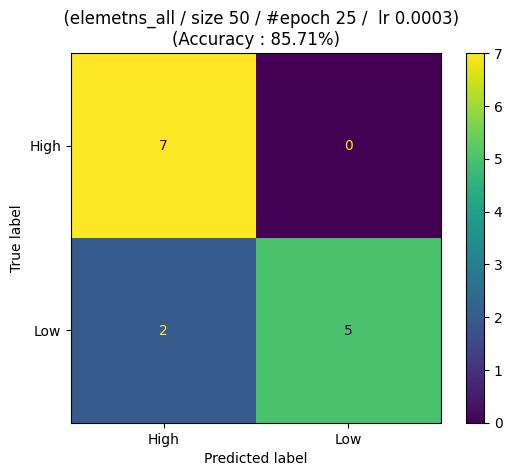

              precision    recall  f1-score   support

           0       0.57      0.57      0.57         7
           1       0.57      0.57      0.57         7

    accuracy                           0.57        14
   macro avg       0.57      0.57      0.57        14
weighted avg       0.57      0.57      0.57        14



<Figure size 640x480 with 0 Axes>

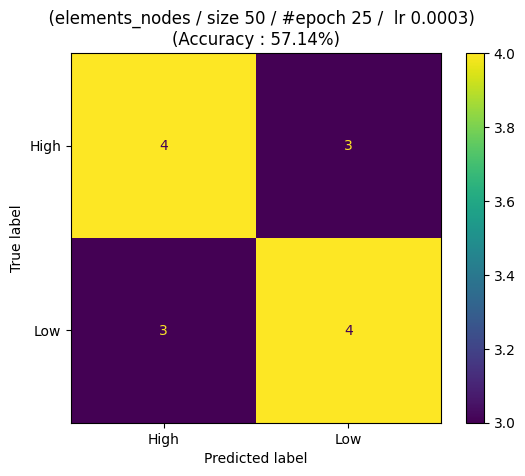

              precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



<Figure size 640x480 with 0 Axes>

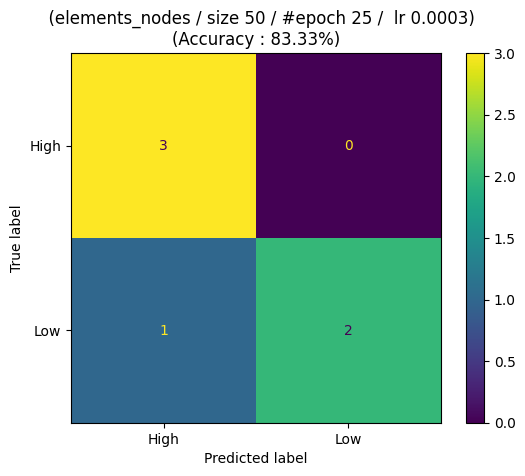

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         6
           1       0.75      1.00      0.86         6

    accuracy                           0.83        12
   macro avg       0.88      0.83      0.83        12
weighted avg       0.88      0.83      0.83        12



<Figure size 640x480 with 0 Axes>

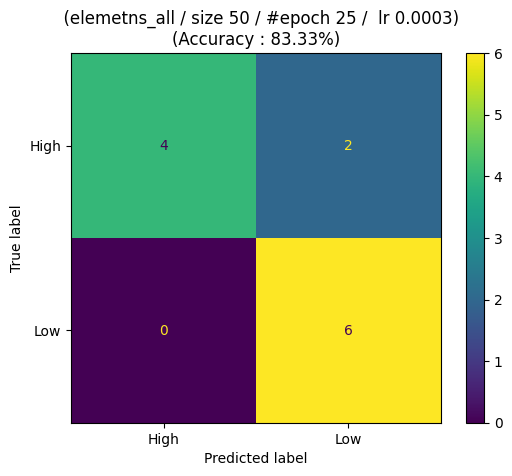

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.67      0.67      0.67         3

    accuracy                           0.67         6
   macro avg       0.67      0.67      0.67         6
weighted avg       0.67      0.67      0.67         6



<Figure size 640x480 with 0 Axes>

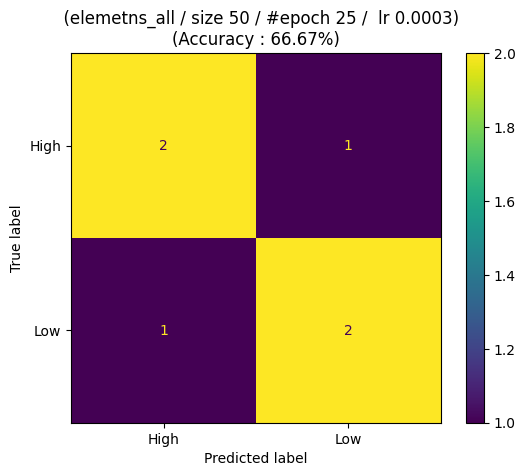

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         6
           1       0.67      0.67      0.67         6

    accuracy                           0.67        12
   macro avg       0.67      0.67      0.67        12
weighted avg       0.67      0.67      0.67        12



<Figure size 640x480 with 0 Axes>

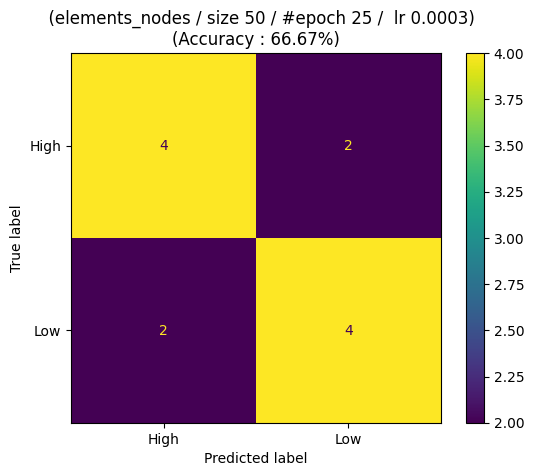

<Figure size 640x480 with 0 Axes>

In [8]:
from sklearn.metrics import classification_report
from sklearn import metrics

for index, _ in enumerate(conf_mats):
    try:
        preds = conf_mats[index]
        actual	= preds['all_y_true']
        predicted	= preds['all_y_pred']

        gpt_metrics = compiled_res.iloc[index]
        confusion_matrix = metrics.confusion_matrix(actual, predicted)
        print(classification_report(actual, predicted))


        cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ['High','Low'])
        cm_display.plot()

        plt.title('{} ({} / size {} / #epoch {} /  lr {})\n(Accuracy : {}%)'.format(' ' , gpt_metrics['representation'], gpt_metrics['size'], gpt_metrics['num_epochs'], gpt_metrics['lr'],round(100*gpt_metrics['accuracy'], 2)))
        if not os.path.exists('ConfusionMatrices'):
            os.mkdir('ConfusionMatrices')
        plt.savefig('ConfusionMatrices/{}_{}_size{}_#epochs_{}_lr_{}.png'.format(FOLDER , gpt_metrics['representation'], gpt_metrics['size'], gpt_metrics['num_epochs'], gpt_metrics['lr']))
        plt.show()
    except Exception as e:
        print(e)
    plt.clf()